# Сравнительный анализ разных методов регрессии

#### Описание предметной области 

Вас только что наняла на работу буровая компания, 
которая применяет рентгеновские лучи для определения плотности камня. 
Задача в том, чтобы вовремя менять буровые головки прежде, чем переходить к бурению камня!

Компания представила Вам результаты лабораторных тестов - в них измеряется отражённый сигнал, полученный сенсорами на разных частотах в герцах, для различной плотности камня. Оказалось, что если отобразить эти результаты на графике, то мы получим синусоиду - с изменением плотности камня уровень отражённого сигнала меняется волнообразно...

#### Признаки

    1. Rebound Signal Strength nHz - уровень отраженного сигнала
    2. Rock Density kg/m3 - твёрдость породы
    


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('rock_density_xray.csv')

### Посмотрим на данные

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


### Переименуем колонки для удобства

In [6]:
df.columns = ['Signal', 'Density'] 

In [9]:
df.describe()

,Signal,Density
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


<Axes: ylabel='count'>

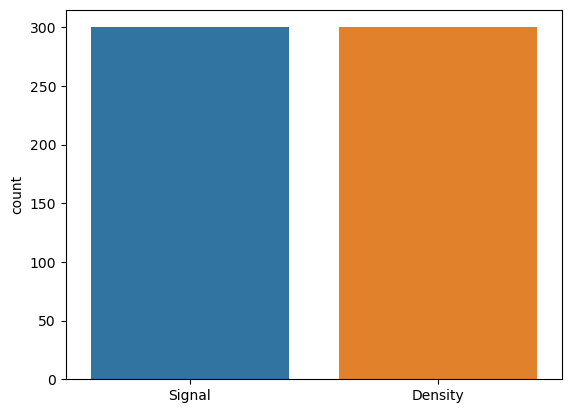

In [10]:
sns.countplot(data = df)

<Axes: >

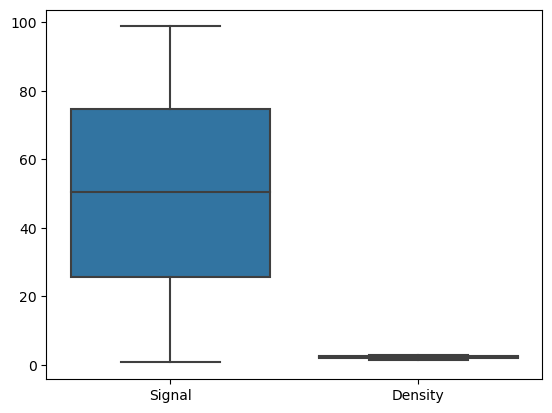

In [12]:
sns.boxplot(data = df)

### Работа здесь с очищенными данными. Посмотрим, как выглядит график scatterplot 

<Axes: xlabel='Signal', ylabel='Density'>

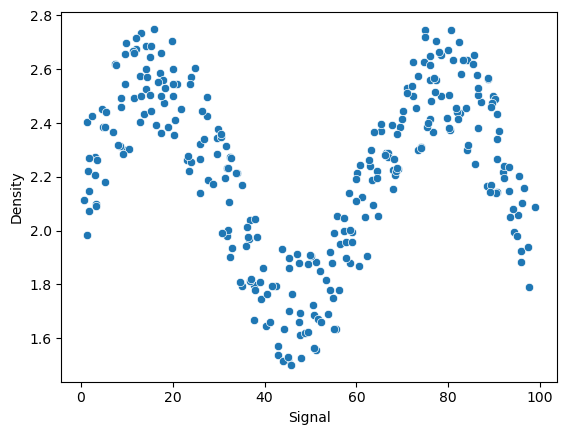

In [16]:
sns.scatterplot(data = df, x = 'Signal', y = 'Density')

### Применим разные модели ML и посмотрим на метрики оценки

### Разбиение модели на выборки

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [19]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=101)

## Линейная регрессия

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
preds = lr_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Оценка метрик 

In [24]:
MAE = mean_absolute_error(y_test, preds)
MAE

0.211198973318633

In [25]:
MSE = mean_squared_error(y_test, preds)
MSE

0.0660516726514864

In [26]:
RMSE = np.sqrt(MSE)
RMSE

0.2570051996584629

#### Визуализация

In [27]:
signal_range = np.arange(0,100)

In [28]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

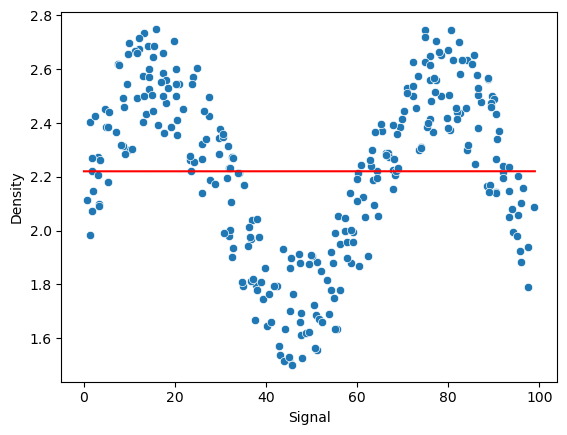

In [32]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)
plt.plot(signal_range, lr_output, color = 'Red')

## Полиномиальная регрессия, степень = 2

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [34]:
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Визуализация

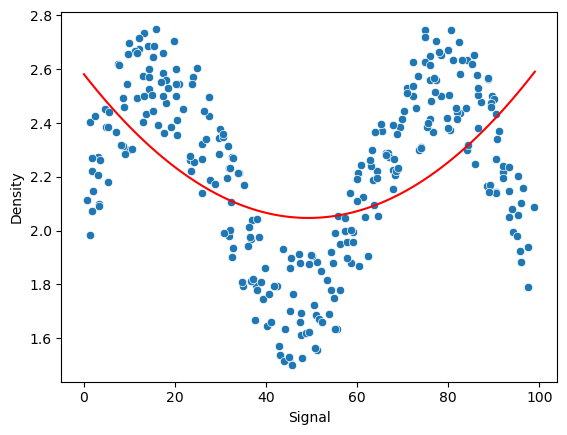

In [46]:
preds = pipe.predict(X_test)
signal_range = np.arange(0,100)
output = pipe.predict(signal_range.reshape(-1,1))
sns.scatterplot(data = df, x = 'Signal', y = 'Density')
plt.plot(signal_range, output, color = 'Red')

### Оценка метрик

In [47]:
MAE = mean_absolute_error(y_test, preds)
MAE

0.22903105443511335

In [48]:
MSE = mean_squared_error(y_test, preds)
MSE

0.07937233177859711

In [50]:
RMSE = np.sqrt(MSE)
RMSE

0.2817309563725596

## Полиномиальная регрессия, степень = 10

In [52]:
pipe = make_pipeline(PolynomialFeatures(10), LinearRegression())
pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)

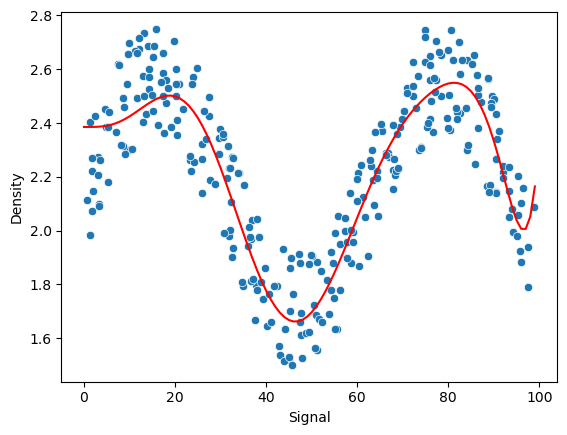

In [55]:
signal_range = np.arange(0,100)
output = pipe.predict(signal_range.reshape(-1,1))
sns.scatterplot(data = df, x = 'Signal', y = 'Density')
plt.plot(signal_range, output, color = 'Red')

### Оценка метрик

In [56]:
MAE = mean_absolute_error(y_test, preds)
MAE

0.12448948257771185

In [57]:
MSE = mean_squared_error(y_test, preds)
MSE

0.01963309769250948

In [58]:
RMSE = np.sqrt(MSE)
RMSE

0.14011815618437704

## Регрессия KNN

In [59]:
from sklearn.neighbors import KNeighborsRegressor

#### Напишем функцию run_model, чтобы не повторяться с кодом обучения модели и построения графиков

In [60]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Обучение модели
    model.fit(X_train,y_train)
    
    # Вычисление метрик
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Рисуем график с результатами
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

#### Оценка работы

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


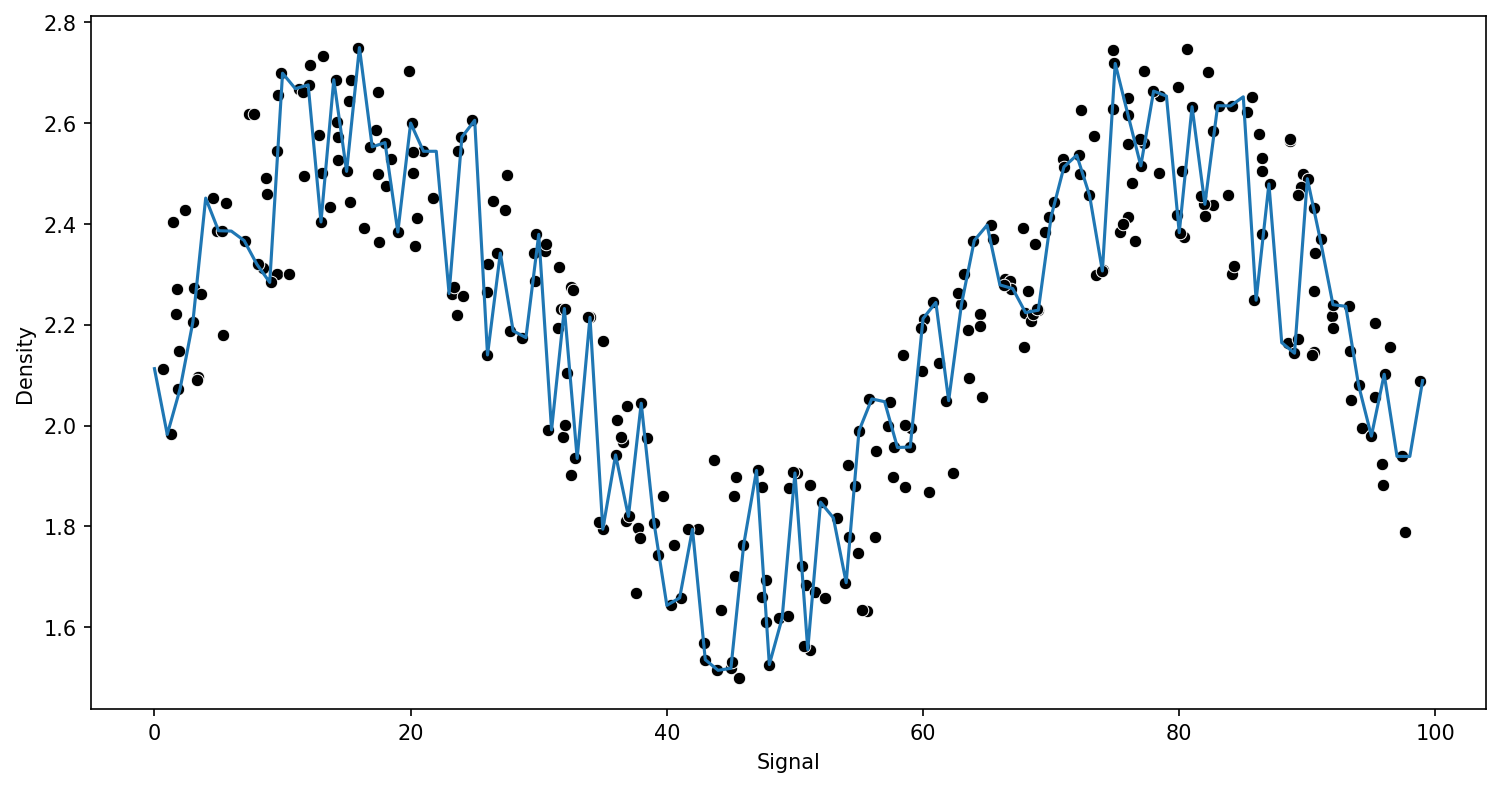

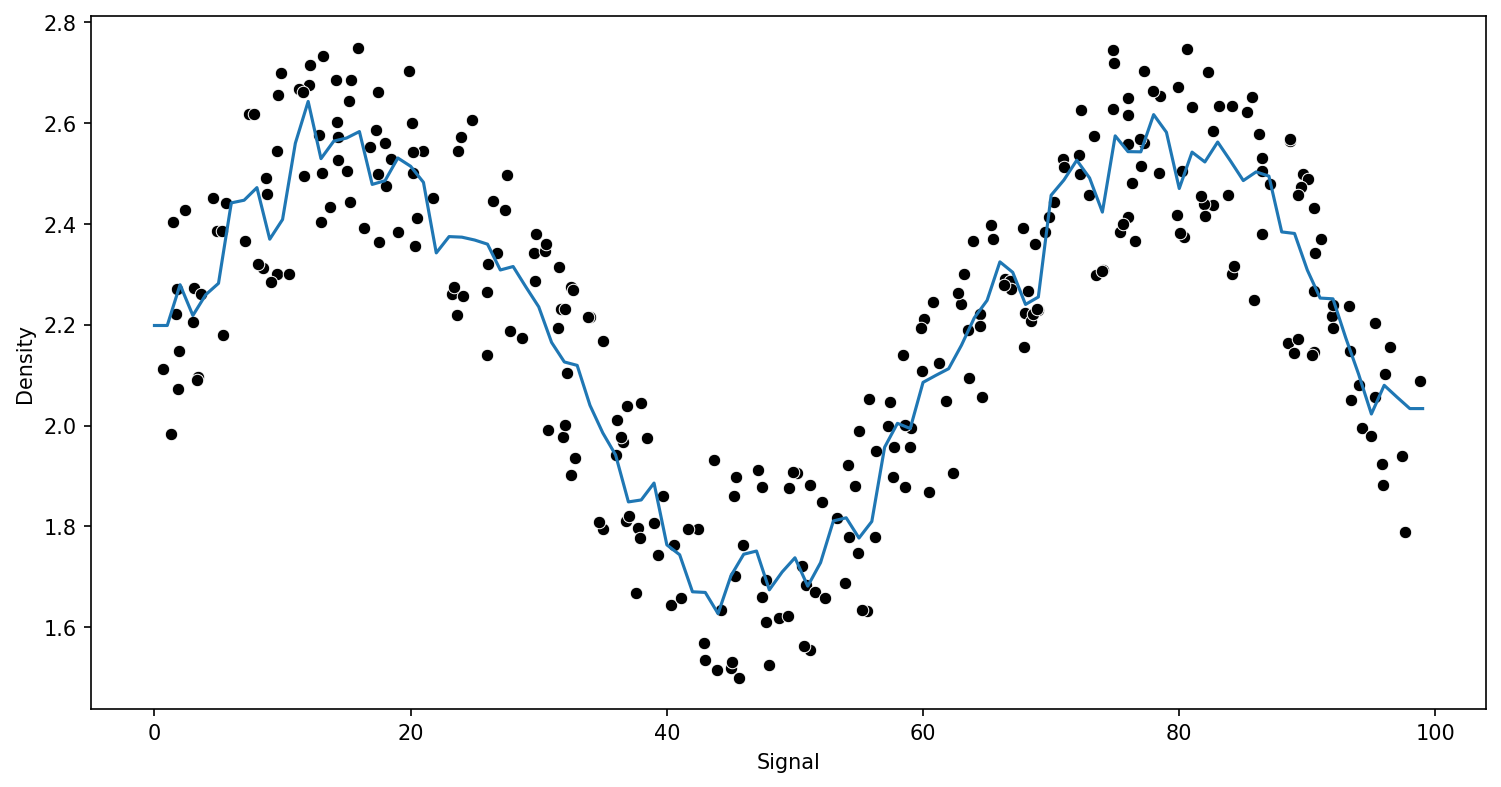

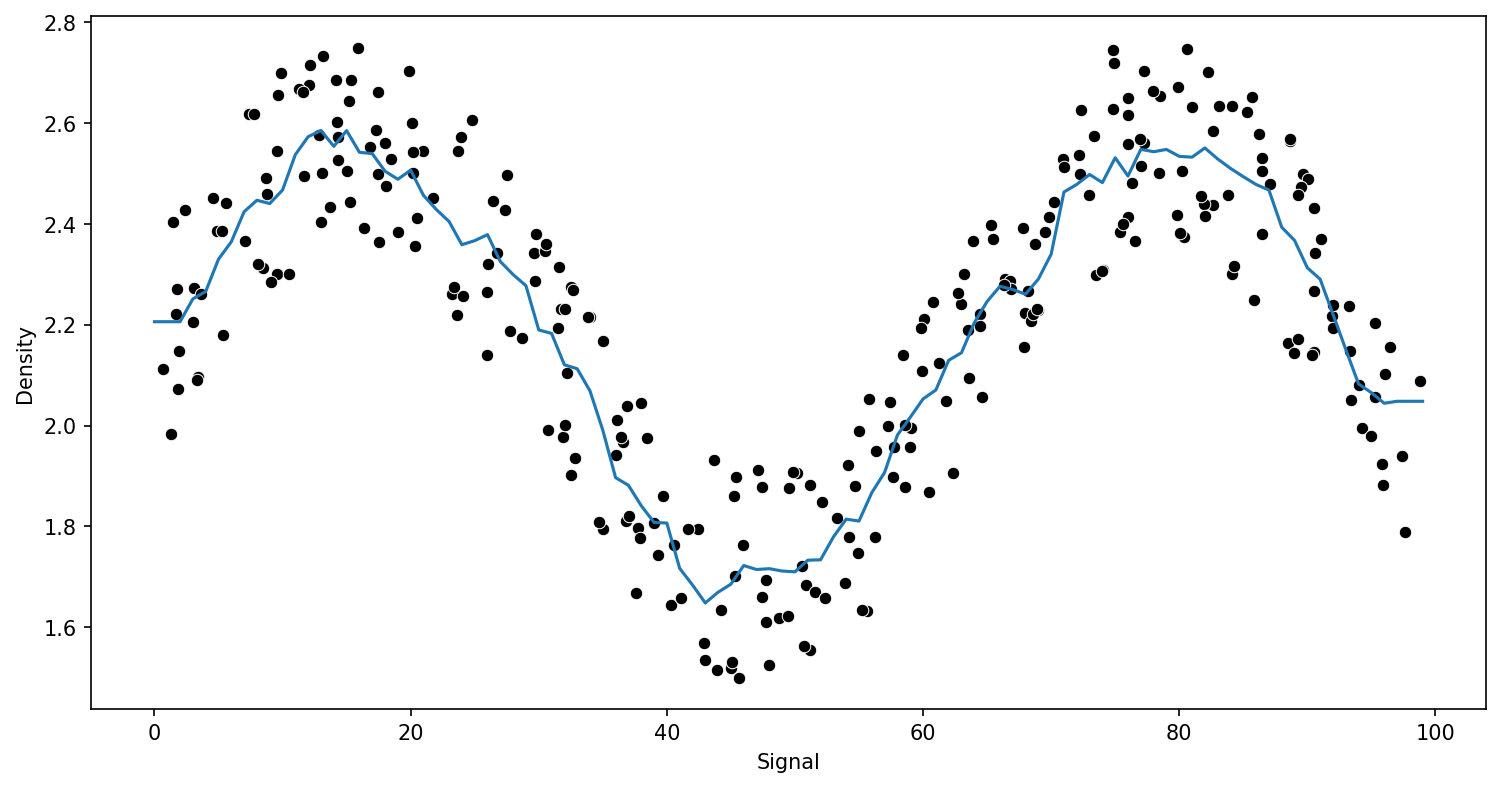

In [61]:
k = [1,5,10]

for n in k:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

## Метод опорных векторов

In [62]:
from sklearn.svm import SVR

In [63]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {'C':[0.001, 0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()
model = GridSearchCV(svr, param_grid)

RMSE : 0.12646999302046696


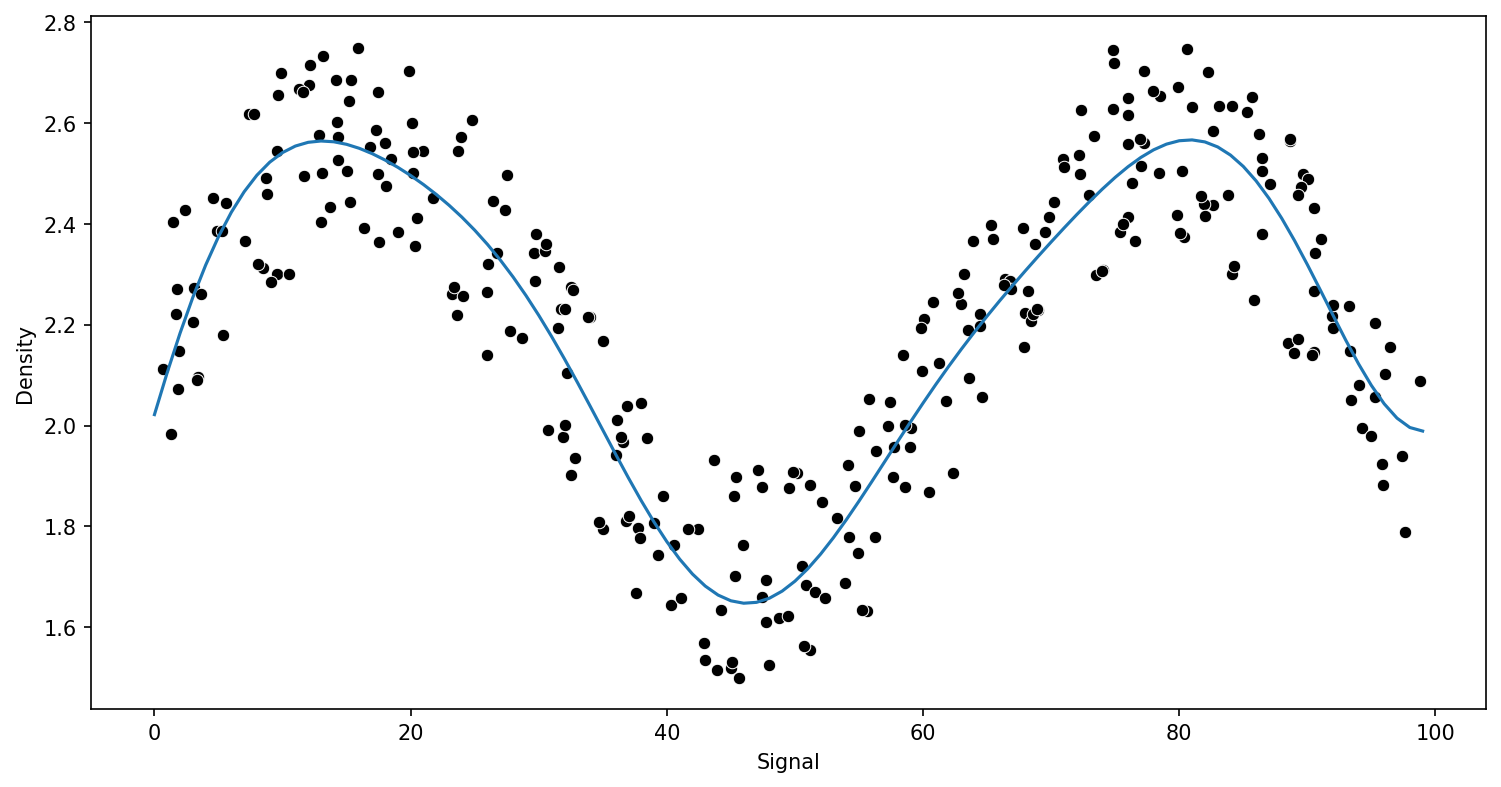

In [73]:
run_model(model, X_train, y_train, X_test, y_test)

In [74]:
model.best_params_

{'C': 1000, 'gamma': 'scale'}

## Метод случайных деревьев

In [75]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.13420601401588161


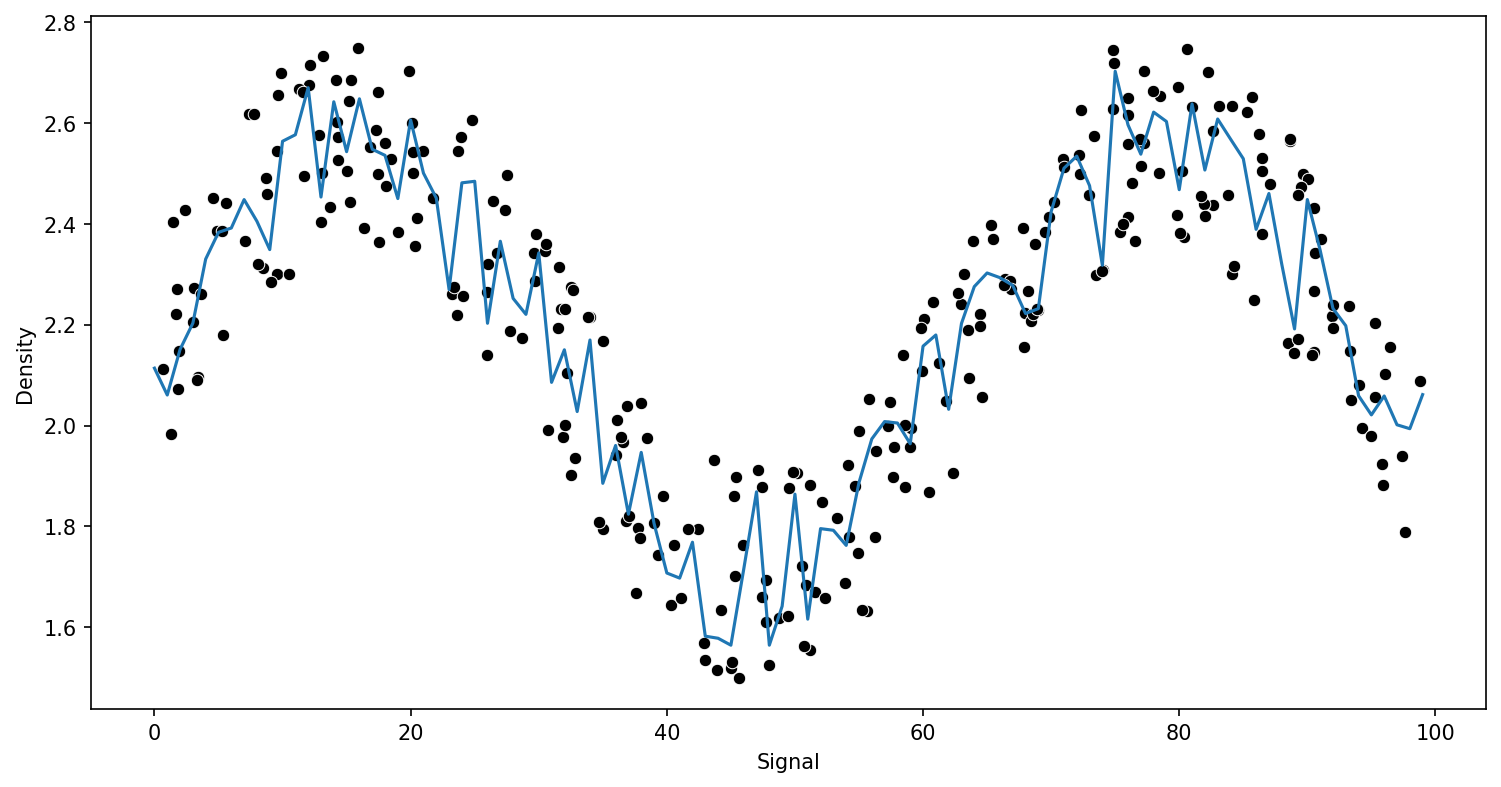

In [82]:
param_grid = {'n_estimators':[10, 50, 100, 300, 500]}
forest = RandomForestRegressor()
model = GridSearchCV(forest, param_grid)
run_model(model, X_train, y_train, X_test, y_test)

## Адаптивный бустинг

In [84]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.1380362925046567
RMSE : 0.1344744092894072
RMSE : 0.13001432766423918


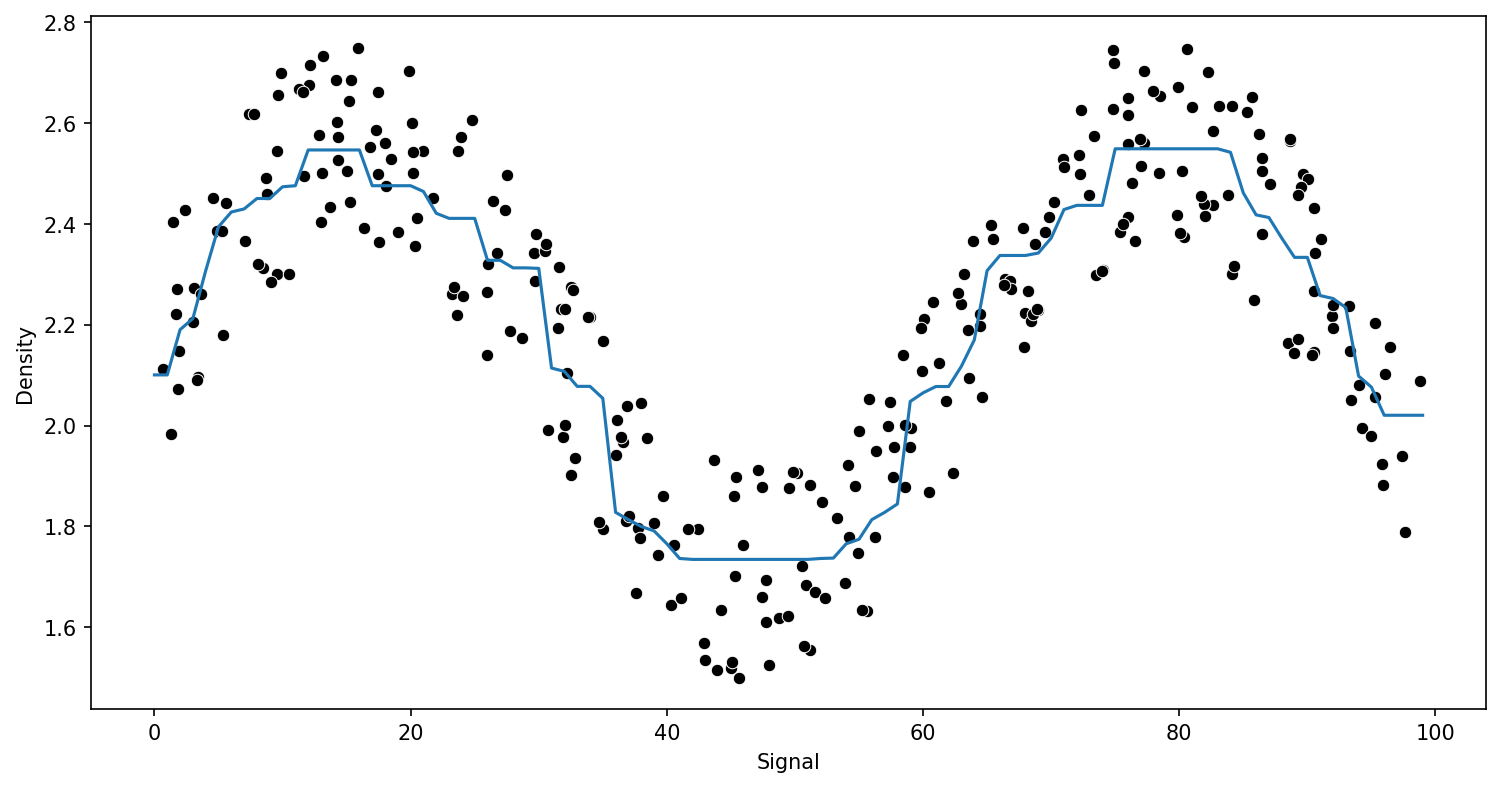

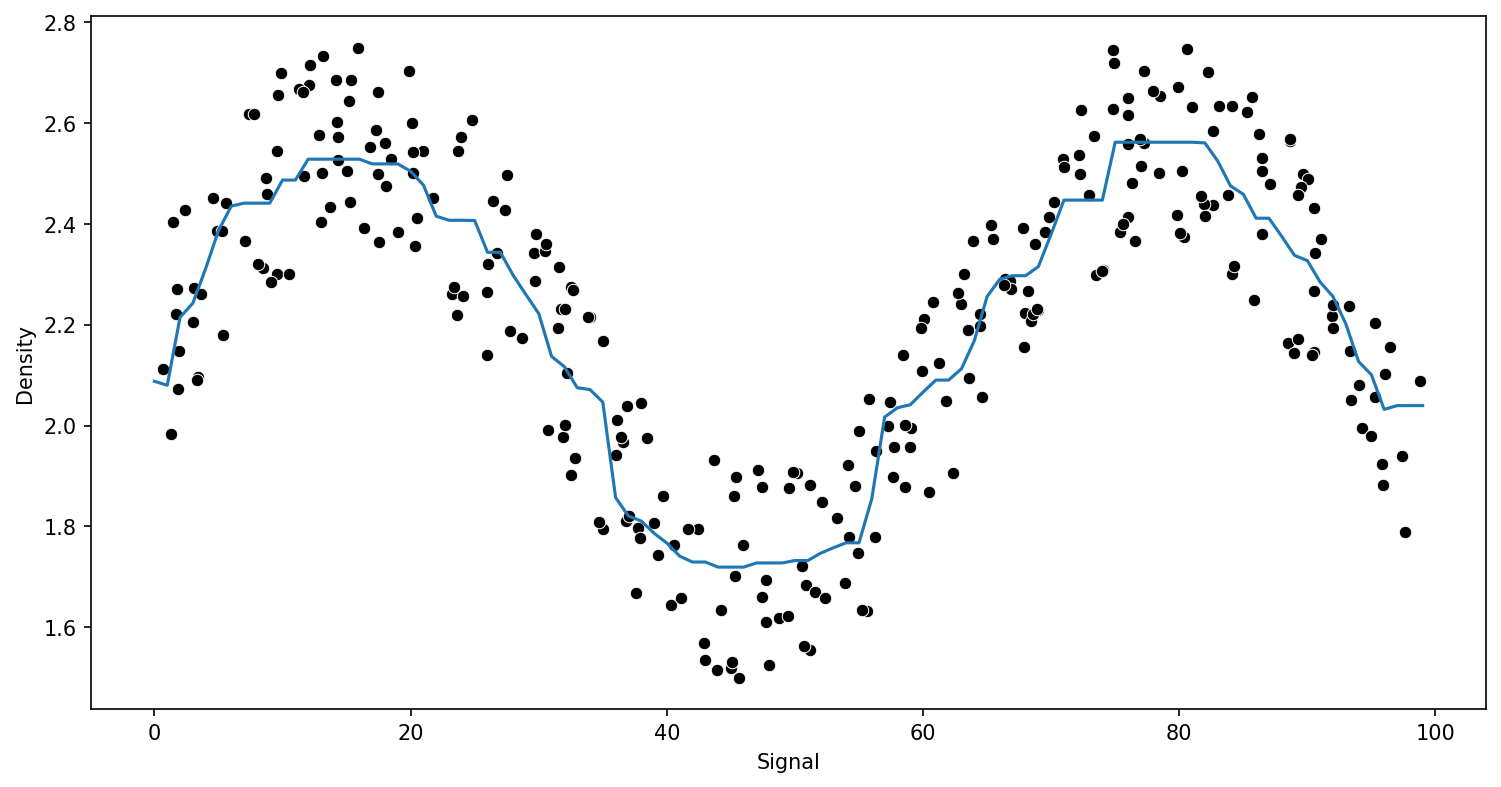

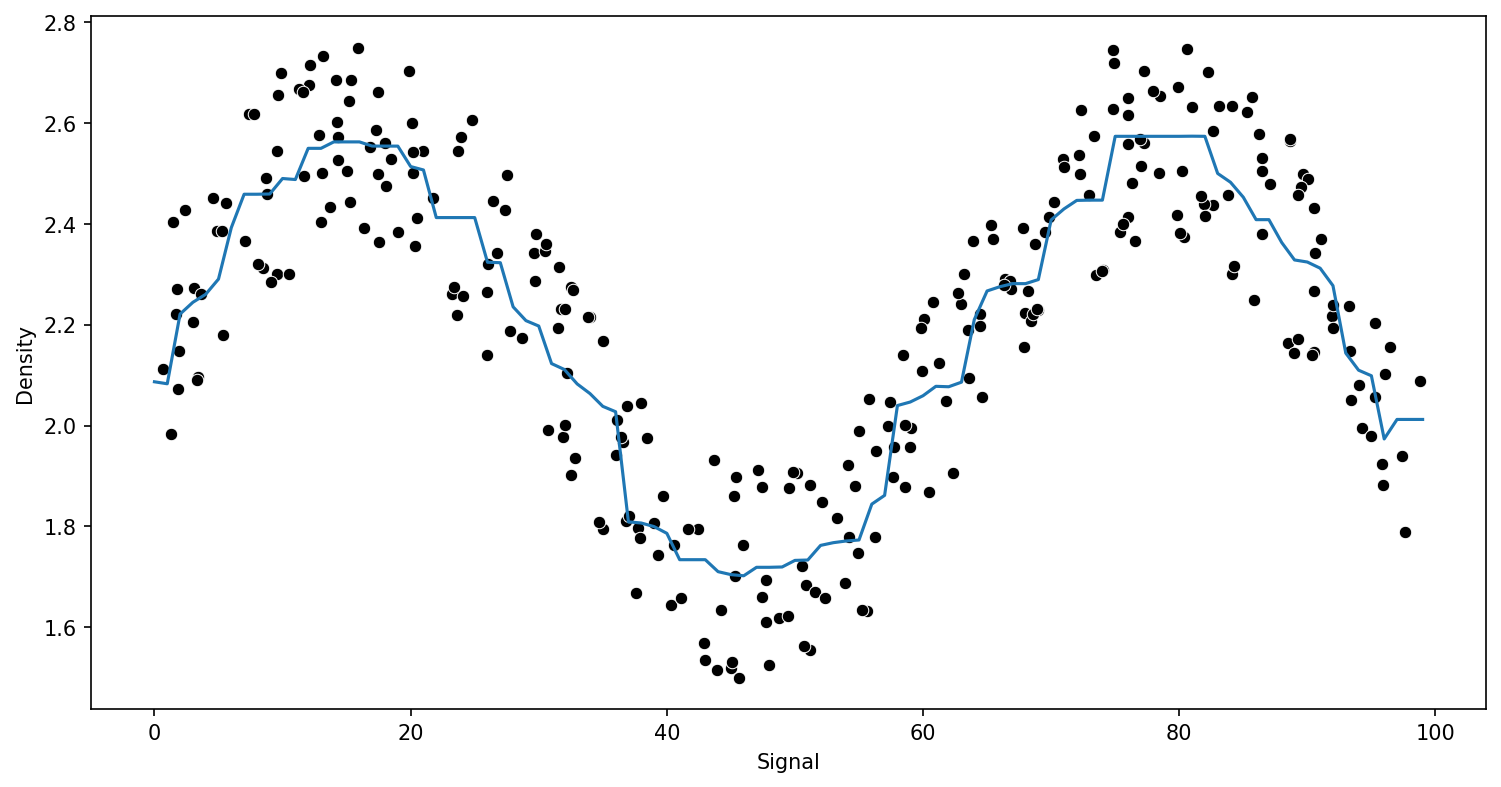

In [87]:
k = [50, 100, 500]
for boost in k:
    Ada = AdaBoostRegressor(n_estimators=boost)
    run_model(Ada, X_train, y_train, X_test, y_test)
    

## Градиентный бустинг

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13621627599805877


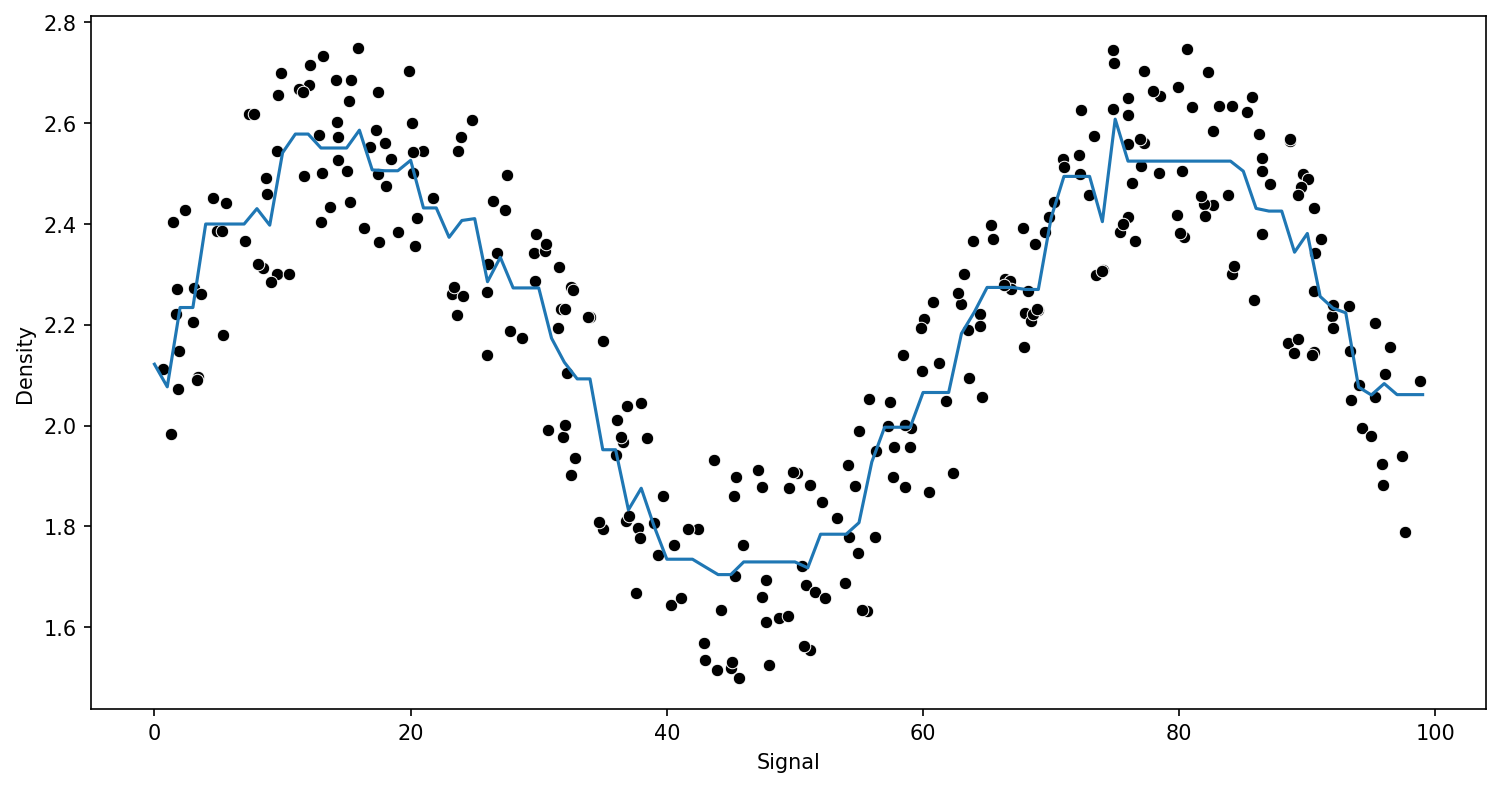

In [90]:
grad = GradientBoostingRegressor()
param_grid = {'learning_rate':[0.001, 0.01, 0.1, 0.5, 0.8],
    'n_estimators': [10,50,100,200]}
model = GridSearchCV(grad, param_grid)
run_model(model, X_train, y_train, X_test, y_test)

In [91]:
model.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}